In [4]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Reading the data
Data = pd.read_csv('insurance.csv')
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
Data.shape   #shape of data

(1338, 7)

In [8]:
#Datatypes of attributes
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#Checking presence of null or misssing values
Data.isnull().values.any()

False

In [10]:
#Checking presence and total number of null or misssing values
Data.isnull().sum().sum()

0

In [11]:
#5 point summary of numerical attributes
Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
#5 point summary of numerical attributes min value
print(Data.min())

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges       1121.87
dtype: object


In [13]:
#5 point summary of numerical attributes 1st quartile
print(Data.quantile(q=0.25))

age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64


In [14]:
#5 point summary of numerical attributes 2nd quartile (half)
print(Data.quantile(q=0.50))

age           39.000
bmi           30.400
children       1.000
charges     9382.033
Name: 0.5, dtype: float64


In [15]:
#5 point summary of numerical attributes 3rd quartile
print(Data.quantile(q=0.75))

age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64


In [16]:
#5 point summary of numerical attributes max value
print(Data.max())

age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges       63770.4
dtype: object


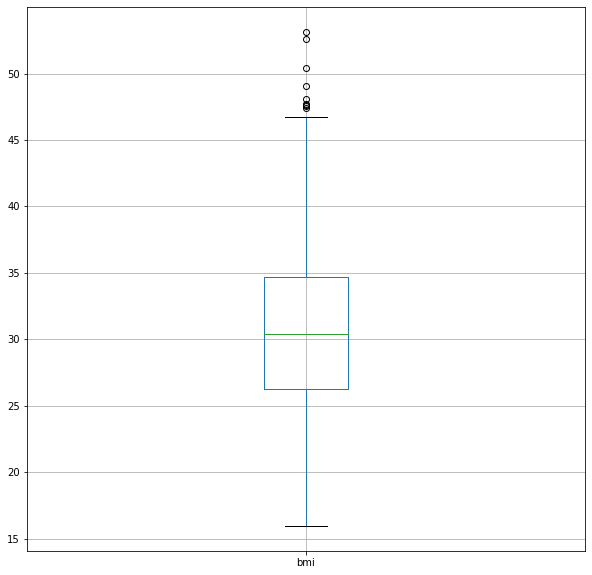

In [17]:
#distribution of bmi
Data.boxplot(column="bmi",return_type='axes',figsize=(10,10))

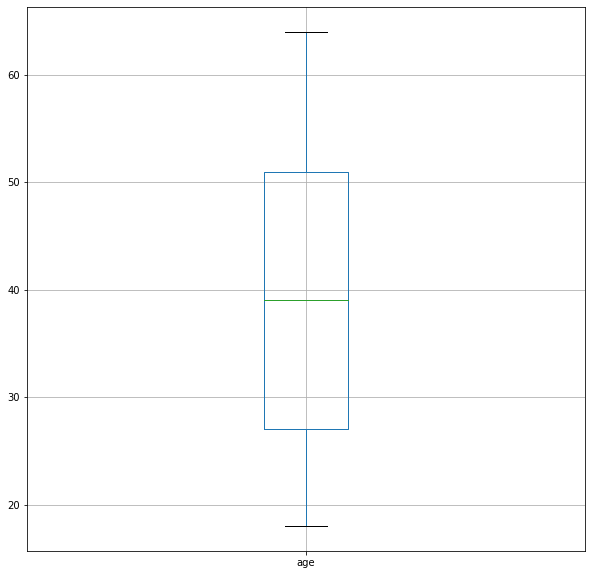

In [80]:
#distribution of age
Data.boxplot(column="age",return_type='axes',figsize=(10,10))

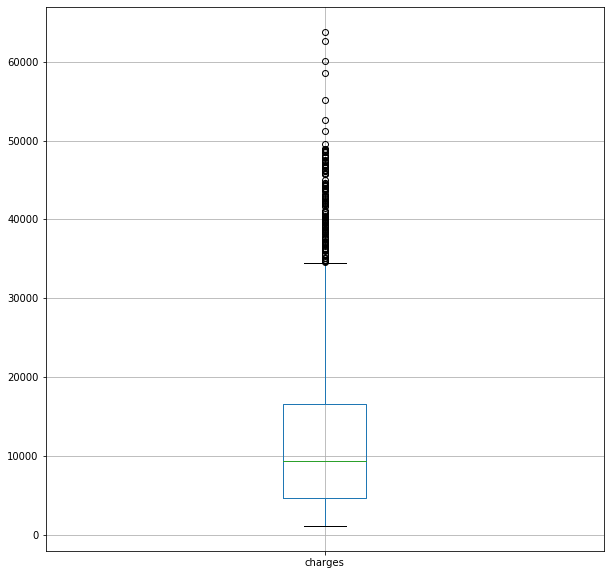

In [18]:
#distribution of charges
Data.boxplot(column="charges",return_type='axes',figsize=(10,10))

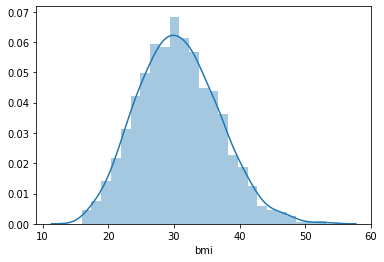

In [19]:
#checking of skewness of bmi
sns.distplot(Data['bmi'])

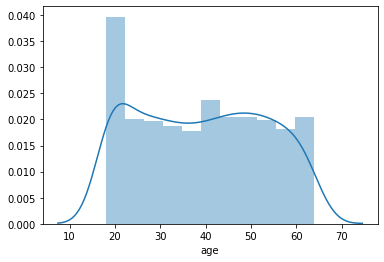

In [20]:
#checking of skewness of age
sns.distplot(Data['age'])

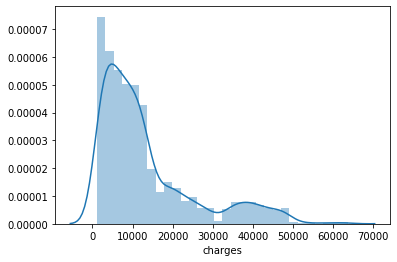

In [21]:
#checking of skewness of charges
sns.distplot(Data['charges'])

In [22]:
#Measure of skewness
Data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

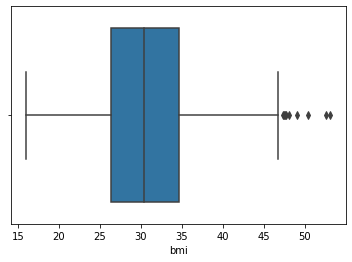

In [23]:
#checking of outliers
import seaborn as sns
sns.boxplot(x=Data['bmi'])

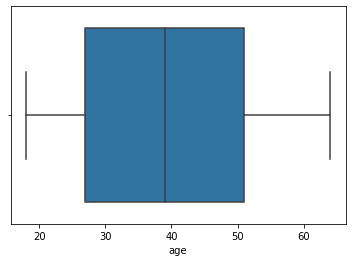

In [24]:
sns.boxplot(x=Data['age'])

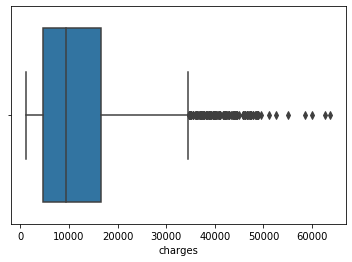

In [25]:
sns.boxplot(x=Data['charges'])

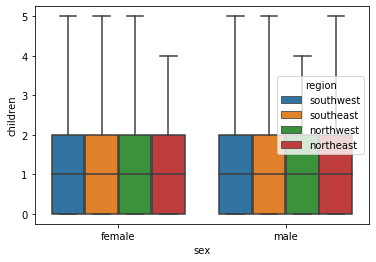

In [26]:
#distribution of categorical variables
sns.boxplot(Data['sex'], Data['children'], hue=Data['region'])

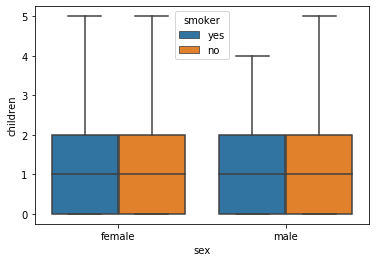

In [27]:
sns.boxplot(Data['sex'], Data['children'], hue=Data['smoker'])

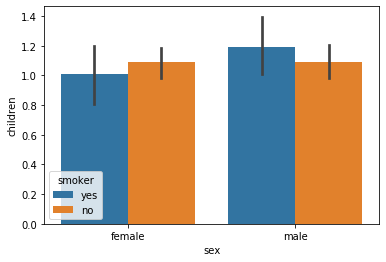

In [28]:
sns.barplot(Data['sex'], Data['children'], hue=Data['smoker'])

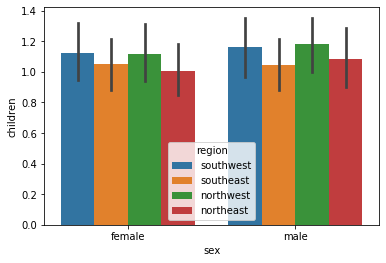

In [30]:
sns.barplot(Data['sex'], Data['children'], hue=Data['region'])

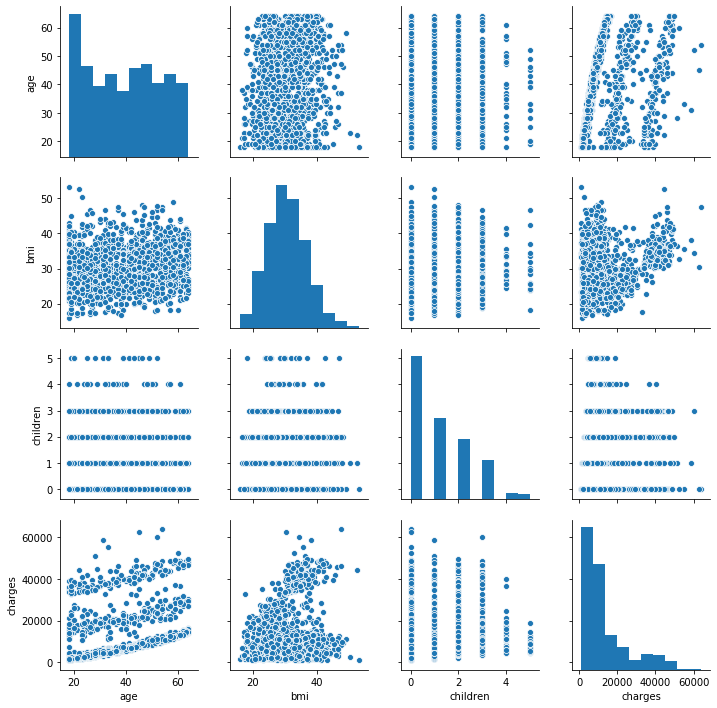

In [31]:
#pairplot
sns.pairplot(Data[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']])

In [32]:
Data['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [33]:
pd.Series([1,2],index=['charges','smoker'])

charges    1
smoker     2
dtype: int64

In [34]:
Data_Test = Data[['charges','smoker']]
print(Data_Test)

          charges smoker
0     16884.92400    yes
1      1725.55230     no
2      4449.46200     no
3     21984.47061     no
4      3866.85520     no
...           ...    ...
1333  10600.54830     no
1334   2205.98080     no
1335   1629.83350     no
1336   2007.94500     no
1337  29141.36030    yes

[1338 rows x 2 columns]


In [35]:
#Do charges of people who smoke differ significantly from the people who don't?
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('charges ~ smoker', data = Data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table) 
#H0: Mean of charges of the People who smoke are equal
#Ha: Mean of charges of the People who smoke are not equal
#think again->#alpha = 0.05 here we get 8.27810^-280 which is very low that means the null hypothesis is 
                 #rejected that means the charges of the people who smoke does vary from those who dont smoke

                sum_sq      df            F         PR(>F)
smoker    1.215199e+11     1.0  2177.614868  8.271436e-283
Residual  7.455432e+10  1336.0          NaN            NaN


In [36]:
#Does bmi of males differ significantly from that of females?
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('bmi ~ sex', data = Data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

#H0: Mean of bmi of the male and female are equal
#Ha: Mean of bmi of the male and female are not equal
#here pvalue we get is 0.0899 which is greater than the alpha which is 0.05 that
#makes H0(null hypothesis) to be true. So bmi of males differing significantly with females is not valid

                sum_sq      df        F    PR(>F)
sex         106.912532     1.0  2.87897  0.089976
Residual  49613.287854  1336.0      NaN       NaN


In [37]:
Data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [38]:
Data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [39]:
Data[['smoker','sex']].corr() # No correlation.

""


In [46]:
#Is the proportion of smokers significantly different in different genders?
#import statsmodels.api         as     sm
#from   statsmodels.formula.api import ols
 
#mod = ols('smoker ~ sex', data = Data).fit()
#aov_table = sm.stats.anova_lm(mod, typ=2)
#print(aov_table)
#headers = Data.pop(0)
female_smokers = Data[Data['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = Data[Data['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = Data.sex.value_counts()[1] # number of females in the data
n_males = Data.sex.value_counts()[0] #number of males in the data

In [48]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
print(pval)#With a p-value of 0.0053 the difference is significant. aka We reject the null

0.005324114164320532


In [62]:
df2 = pd.DataFrame(Data['smoker'])
print(df2)

     smoker
0       yes
1        no
2        no
3        no
4        no
...     ...
1333     no
1334     no
1335     no
1336     no
1337    yes

[1338 rows x 1 columns]


In [42]:
#Is the distribution of bmi across women with no children, one child and two children, the same?
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('bmi ~ children', data = Data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
#H0: bmi mean is same for all three -> true
#Ha: bmi mean is not equal
#pvalue > 0.05 so we can conclude tht bmi distribution is insignificant with varying number of children and no children 

                sum_sq      df         F   PR(>F)
children      8.093929     1.0  0.217522  0.64101
Residual  49712.106457  1336.0       NaN      NaN
